<a href="https://colab.research.google.com/github/lorek/MethodsClassDimRed/blob/main/MoCaDR_List_nr_4_intro_nn_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION TO NEURAL NETWORKS, PART 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# keras
from keras.datasets import mnist

from keras.models import Sequential, Model
from keras.layers import Dense
from keras import optimizers
from sklearn.linear_model import LinearRegression
from datetime import datetime
# torch
import torch

In [ ]:
!pip install torchinfo
from torchinfo import summary as torch_summary

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda



## Linear Regression (again)
### Data:
We are given $n$ points $(x_1,y_1), \ldots, (x_n,y_n)$.
Example: $n=200$:

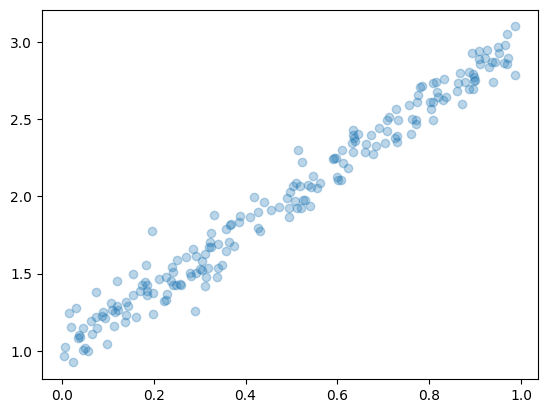

In [ ]:
nr_points=200
np.random.seed(42)
x_train = np.random.rand(nr_points, 1)

a_true=2;
b_true=1;
y_train = b_true + a_true * x_train + .1 * np.random.randn(nr_points, 1)

plt.scatter(x_train,y_train,alpha=0.3)

# LinReg from sklearn, to compare

linr = LinearRegression()
linr.fit(x_train, y_train)
a_skl = linr.coef_[0].item()
b_skl = linr.intercept_.item()



## Simplest Neural Network:
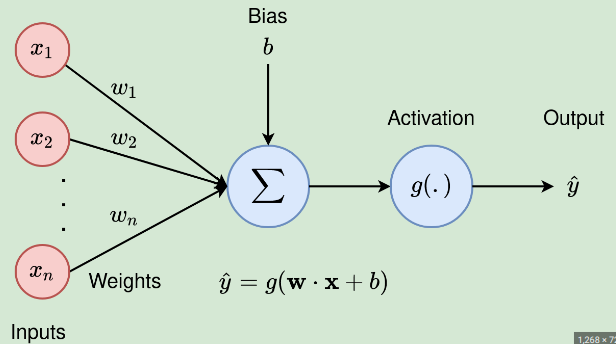

In our case $n=1$: $w_1=a$, bias $ = b, g(x)=x$

# Keras implementation:

In [ ]:

# create model, ONE neuron, input_dim = 1
# activation = linear, actually = do nothing extra.
model_lr_keras = Sequential()
model_lr_keras.add(Dense(1, activation = 'linear', input_dim = 1))  # x's are 1 dimensional

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_lr_keras.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# use Adam() or SGD() optimizer
#optim = optimizers.SGD()
optim = optimizers.Adam(learning_rate=0.1)

# loss = mean_squared_error. I.e., optimze squared error
model_lr_keras.compile(optimizer=optim, loss = 'mean_squared_error')

### TRAIN the model:

In [ ]:
model_lr_keras.fit(x_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 8.1545
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.4542 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.7943 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 3.8166 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.9496
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.9524
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.3155
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.9480 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5757
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3755
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2630
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2475
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2468 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2816
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3064 
Epoch 16/20

In [ ]:
y_pred = model_lr_keras.predict(x_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


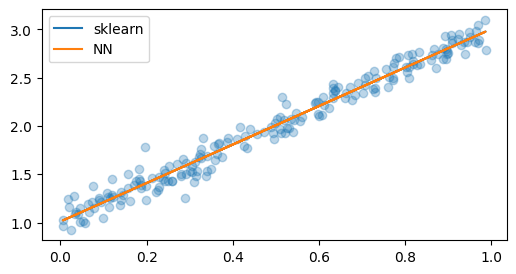

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(x_train,y_train,alpha=0.3)

plt.plot(x_train ,a_skl*x_train +b_skl, label = "sklearn")
plt.plot(x_train,y_pred, label = "NN")

plt.legend()

# Torch implementation



## we need data as tensors

In [ ]:
x_train_tensor = torch.tensor(x_train.astype(float), device=device, dtype=torch.float32 )
y_train_tensor = torch.tensor(y_train.astype(float), device=device, dtype=torch.float32 )


In [ ]:
model_lr_torch =torch.nn.Sequential( torch.nn.Linear(1,1)).to(device)

In [ ]:
torch_summary(model_lr_torch)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            2
Total params: 2
Trainable params: 2
Non-trainable params: 0

In [ ]:
#model(x_train_tensor).T # predicted y's

In [ ]:
optimizer_torch =  torch.optim.SGD(params=model_lr_torch.parameters(),lr=0.2)

In [ ]:
loss_torch = torch.nn.MSELoss()

In [ ]:
loss_torch(x_train_tensor, y_train_tensor)

tensor(2.3168, device='cuda:0')

In [ ]:
n_epochs = 200

for epoch in range(n_epochs):
  y_pred_tensor = model_lr_torch(x_train_tensor)
  loss = loss_torch(y_pred_tensor, y_train_tensor)
  loss.backward()
  optimizer_torch.step()
  optimizer_torch.zero_grad()
  if epoch % 10 == 0:
    print("epoch = ", epoch, ",\t loss = ",loss.item())

epoch =  0 ,	 loss =  6.154055595397949
epoch =  10 ,	 loss =  0.06829805672168732
epoch =  20 ,	 loss =  0.0429856963455677
epoch =  30 ,	 loss =  0.028542164713144302
epoch =  40 ,	 loss =  0.020298678427934647
epoch =  50 ,	 loss =  0.015593795105814934
epoch =  60 ,	 loss =  0.012908535078167915
epoch =  70 ,	 loss =  0.011375952512025833
epoch =  80 ,	 loss =  0.010501248762011528
epoch =  90 ,	 loss =  0.010002021677792072
epoch =  100 ,	 loss =  0.009717097505927086
epoch =  110 ,	 loss =  0.009554477408528328
epoch =  120 ,	 loss =  0.009461664594709873
epoch =  130 ,	 loss =  0.009408690966665745
epoch =  140 ,	 loss =  0.009378456510603428
epoch =  150 ,	 loss =  0.009361202828586102
epoch =  160 ,	 loss =  0.009351353161036968
epoch =  170 ,	 loss =  0.009345733560621738
epoch =  180 ,	 loss =  0.009342527016997337
epoch =  190 ,	 loss =  0.009340695105493069


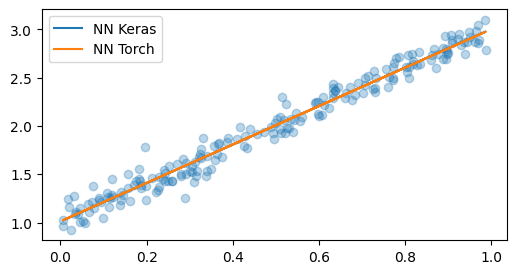

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(x_train,y_train,alpha=0.3)

#plt.plot(x_train ,a_skl*x_train +b_skl, label = "sklearn")

plt.plot(x_train,y_pred, label = "NN Keras")
plt.plot(x_train,y_pred_tensor.cpu().detach().numpy(), label = "NN Torch")


plt.legend()

# Predicting house prices

from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
houses = fetch_california_housing()

n_samples, dim = houses.data.shape

houses_data = houses.data
houses_x = houses.data
houses_y = houses.target

print("houses_x.shape = ",houses_x.shape,", houses_y.shape = ",houses_y.shape)

houses_x.shape =  (20640, 8) , houses_y.shape =  (20640,)


In [ ]:
print(np.round(houses_x[:3],2))
print(np.round(houses_y[:3],2))


[[ 8.3300e+00  4.1000e+01  6.9800e+00  1.0200e+00  3.2200e+02  2.5600e+00
   3.7880e+01 -1.2223e+02]
 [ 8.3000e+00  2.1000e+01  6.2400e+00  9.7000e-01  2.4010e+03  2.1100e+00
   3.7860e+01 -1.2222e+02]
 [ 7.2600e+00  5.2000e+01  8.2900e+00  1.0700e+00  4.9600e+02  2.8000e+00
   3.7850e+01 -1.2224e+02]]
[4.53 3.58 3.52]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(  houses_x, houses_y, test_size=0.2, random_state=42)




### Keras implementation, 1 neuron

### Goal: train model on x_train, y_train, test afterwards on x_test, y_test

In [ ]:
model_keras = Sequential()
model_keras.add(Dense(1, activation = 'linear', input_dim = 8))  # x's are 8 dimensional
model_keras.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
first_layer_weights = model_keras.layers[0].get_weights()[0]
first_layer_weights

array([[ 0.6753218 ],
       [-0.29346114],
       [-0.16943431],
       [-0.06572866],
       [-0.5642379 ],
       [ 0.3058014 ],
       [-0.535962  ],
       [ 0.5816667 ]], dtype=float32)

In [ ]:
# use Adam() or SGD() optimizer
#optim = optimizers.SGD(learning_rate=0.001)
optim = optimizers.Adam(learning_rate=0.01, clipnorm=1.)

# loss = mean_squared_error. I.e., optimze squared error
model_keras.compile(optimizer=optim, loss = 'mean_squared_error')

In [ ]:
model_keras.fit(x_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 463888.4375
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39.7049
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4504
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1434
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3585
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5052
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4330
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3966
Epoch 9/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8880
Epoch 10/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.7622
Epoch 11/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.7074
Epoch 12/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6164
Epoch 13/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6940
Epoch 14/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3788
Epoch 15/100
129/129 ━━━━━━━━━

In [ ]:
first_layer_weights = model_keras.layers[0].get_weights()[0]
first_layer_weights

array([[ 5.2756226e-01],
       [ 1.6314119e-02],
       [-1.8652929e-01],
       [ 9.3341541e-01],
       [-5.3066132e-04],
       [-6.1408374e-03],
       [-5.5571463e-02],
       [-5.8769220e-03]], dtype=float32)

In [ ]:
y_test_pred = model_keras.predict(x_test)
loss_houses = np.mean( (y_test-y_test_pred )**2)
print("Loss on test data:", loss_houses)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Loss on test data: 3.0597512149877466


### Torch implementation, 1 neuron
(no batches)

In [ ]:
# Convert to torch tensors.
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # shape: (N_train, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)



create model and train:

**(Compare with `MoCaDR_List_nr_2_auto_grad.ipynb`)**

In [ ]:
# Define a simple linear model: input dimension = 8, output dimension = 1.
model_torch = torch.nn.Sequential(torch.nn.Linear(8, 1))

# Mean Squared Error Loss
loss_torch = torch.nn.MSELoss()

# Adam optimizer with learning rate 0.01.
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.01)

# Number of training epochs.
epochs = 1000

# Set model to training mode.
model_torch.train()


for epoch in range(epochs):

    # Forward pass on all training data.
    y_pred = model_torch(x_train_tensor)

    # Compute the loss.
    loss = loss_torch(y_pred, y_train_tensor)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(np.mod(epoch,100)==99):
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 4.2583
Epoch 200/1000, Loss: 1.3355
Epoch 300/1000, Loss: 1.1246
Epoch 400/1000, Loss: 1.0110
Epoch 500/1000, Loss: 0.9306
Epoch 600/1000, Loss: 0.8759
Epoch 700/1000, Loss: 0.8389
Epoch 800/1000, Loss: 0.8127
Epoch 900/1000, Loss: 0.7931
Epoch 1000/1000, Loss: 0.7774


In [ ]:
# Evaluate on test data.
model_torch.eval()
with torch.no_grad():
    y_test_pred = model_torch(x_test_tensor)
    test_loss = loss_torch(y_test_pred, y_test_tensor).item()
    print("Test MSE:", test_loss)

Test MSE: 0.7956477999687195


### Why only one layer and one neuron?

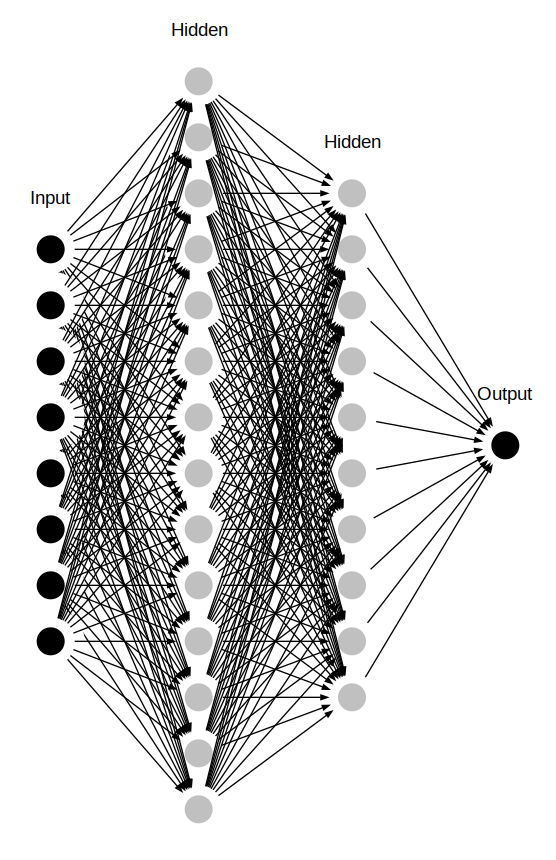

### Also, each layer may have different function:
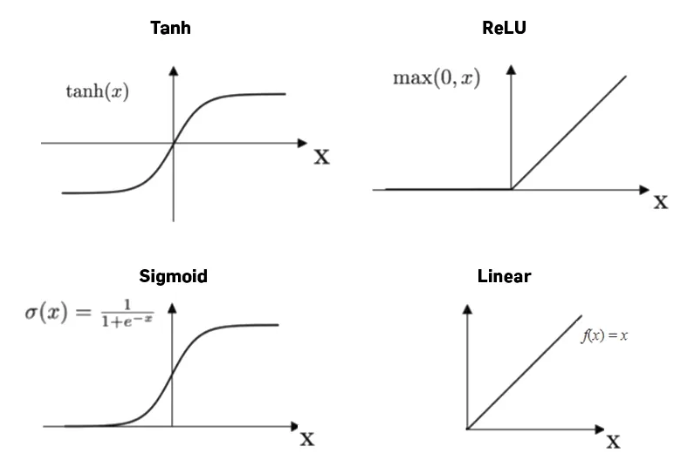

**Keras implementation**

In [ ]:
model_keras2 =  Sequential([
    Dense(512,  activation='elu', input_shape=(8,), name="lay1"),
    Dense(128,  activation='sigmoid', name="lay2"),
    Dense(1,    activation='linear', name="output"),
])
model_keras2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lay1 (Dense)                         │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lay2 (Dense)                         │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,401 (275.00 KB)

 Trainable params: 70,401 (275.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# use Adam() or SGD() optimizer
#optim = optimizers.SGD(learning_rate=0.001)
optim = optimizers.Adam(learning_rate=0.01, clipnorm=1.)

# loss = mean_squared_error. I.e., optimze squared error
model_keras2.compile(optimizer=optim, loss = 'mean_squared_error')

In [ ]:
model_keras2.fit(x_train, y_train, epochs=50, batch_size=128)

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.1803
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3865
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3628
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3538
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3721
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3506
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3708
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3759
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4283
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3741
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3610
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3439
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3823
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3720
Epoch 15/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [ ]:
x_test.shape

(4128, 8)

In [ ]:
y_test_pred2 = model_keras2.predict(x_test)
lost_houses2 = np.mean( (y_test-y_test_pred2 )**2)
print(lost_houses2)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1.316074983019289


**Torch implementation**

In [ ]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(8, 512),
    torch.nn.ELU(),             # ELU activation
    torch.nn.Linear(512, 128),
    torch.nn.Sigmoid(),         # Sigmoid activation
    torch.nn.Linear(128, 1)     # Output layer (linear activation)
)

In [ ]:
torch_summary(model_torch)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            4,608
├─ELU: 1-2                               --
├─Linear: 1-3                            65,664
├─Sigmoid: 1-4                           --
├─Linear: 1-5                            129
Total params: 70,401
Trainable params: 70,401
Non-trainable params: 0

Note -- exactly the same number of parameters as in Keras implementation

In [ ]:
# Mean Squared Error Loss
loss_torch = torch.nn.MSELoss()

# Adam optimizer with learning rate 0.01.
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.01)

# Number of training epochs.
epochs = 50


**NO BATCHES**

In [ ]:

model_torch.train()  # set model to training mode


# Training loop (full-batch training for simplicity).
for epoch in range(epochs):


    optimizer.zero_grad()


    y_pred = model_torch(x_train_tensor)
    loss = loss_torch(y_pred, y_train_tensor)

    loss.backward()
    optimizer.step()

    if(np.mod(epoch,10)==9):
      print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/50, Loss: 1.4382
Epoch 20/50, Loss: 1.3621
Epoch 30/50, Loss: 1.3373
Epoch 40/50, Loss: 1.3392
Epoch 50/50, Loss: 1.3382


In [ ]:
# Evaluate on test data.
model_torch.eval()  # set model to evaluation mode
with torch.no_grad():
    y_test_pred = model_torch(x_test_tensor)
    test_loss = loss_torch(y_test_pred, y_test_tensor).item()
    print("Test MSE:", test_loss)

Test MSE: 1.3121857643127441


**WITH BATCHES**

In [ ]:
model_torch = torch.nn.Sequential(
    torch.nn.Linear(8, 512),
    torch.nn.ELU(),             # ELU activation
    torch.nn.Linear(512, 128),
    torch.nn.Sigmoid(),         # Sigmoid activation
    torch.nn.Linear(128, 1)     # Output layer (linear activation)
)
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.01)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create a dataset and DataLoader with batch size 128.
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

for epoch in range(epochs):
    model_torch.train()  # Set model to training mode.

    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model_torch(batch_x)
        loss = loss_torch(y_pred, batch_y)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 9:
        # Optionally, compute the loss on the entire training set or average the batch losses.
        print(f"Epoch {epoch+1}/{epochs}, Last batch Loss: {loss.item():.4f}")

Epoch 10/50, Last batch Loss: 1.0122
Epoch 20/50, Last batch Loss: 1.4401
Epoch 30/50, Last batch Loss: 1.3564
Epoch 40/50, Last batch Loss: 1.3479
Epoch 50/50, Last batch Loss: 1.5547


In [ ]:
# Evaluate on test data.
model_torch.eval()  # set model to evaluation mode
with torch.no_grad():
    y_test_pred = model_torch(x_test_tensor)
    test_loss = loss_torch(y_test_pred, y_test_tensor).item()
    print("Test MSE:", test_loss)

Test MSE: 1.327992558479309


# AUTOENCODERS

Again, MNIST images:

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
n_samples_train, h, w =     x_train.shape
n_samples_test, _, _ =      x_test.shape

image_size = h*w

x_train = x_train.reshape(x_train.shape[0], 784) / 255
x_test = x_test.reshape(x_test.shape[0], 784) / 255

In [ ]:
print("n_samples_train, h, w, image_size = ",n_samples_train, h, w ,image_size)

n_samples_train, h, w, image_size =  60000 28 28 784


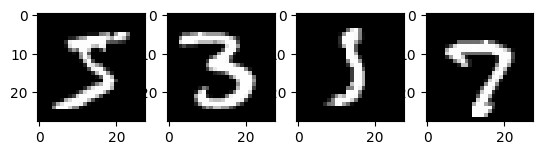

In [ ]:
f = plt.figure()
f.add_subplot(1,4, 1)
img=x_train[0].reshape(h,w)
plt.imshow(img,cmap='gray')
img=x_train[12].reshape(h,w)
f.add_subplot(1,4, 2)
plt.imshow(img,cmap='gray')
f.add_subplot(1,4, 3)
img=x_train[132].reshape(h,w)
plt.imshow(img,cmap='gray')
f.add_subplot(1,4, 4)
img=x_train[52].reshape(h,w)
plt.imshow(img,cmap='gray')
plt.show()

# Goal: "compress" each image to 2d points, later "recover" images from those

# PCA 2d points:

In [ ]:
mu = x_train.mean(axis=0)
U,s,V = np.linalg.svd(x_train - mu, full_matrices=False)
Zpca = np.dot(x_train - mu, V.transpose())

Rpca = np.dot(Zpca[:,:2], V[:2,:]) + mu    # reconstruction



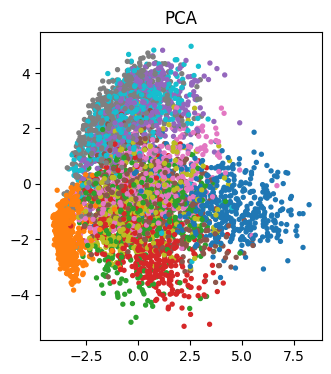

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title('PCA')
plt.scatter(Zpca[:5000,0], Zpca[:5000,1], c=y_train[:5000], s=8, cmap='tab10')

# PCA: images reconstructed from 2d points

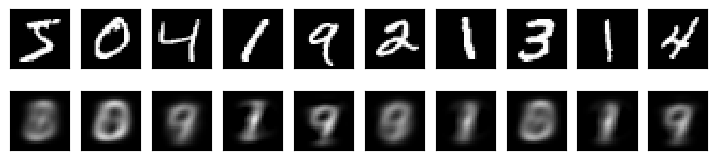

In [ ]:
plt.figure(figsize=(9,3))
toPlot = (x_train, Rpca )
for i in range(10):
    for j in range(2):
        ax = plt.subplot(3, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i,:]).reshape(28,28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

#plt.tight_layout()

In [ ]:
PCA_err = np.sum((x_train-Rpca)**2)/(n_samples_train*image_size)
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));

PCA reconstruction error with 2 PCs: 0.056


# Autoencoder AE
## Network:

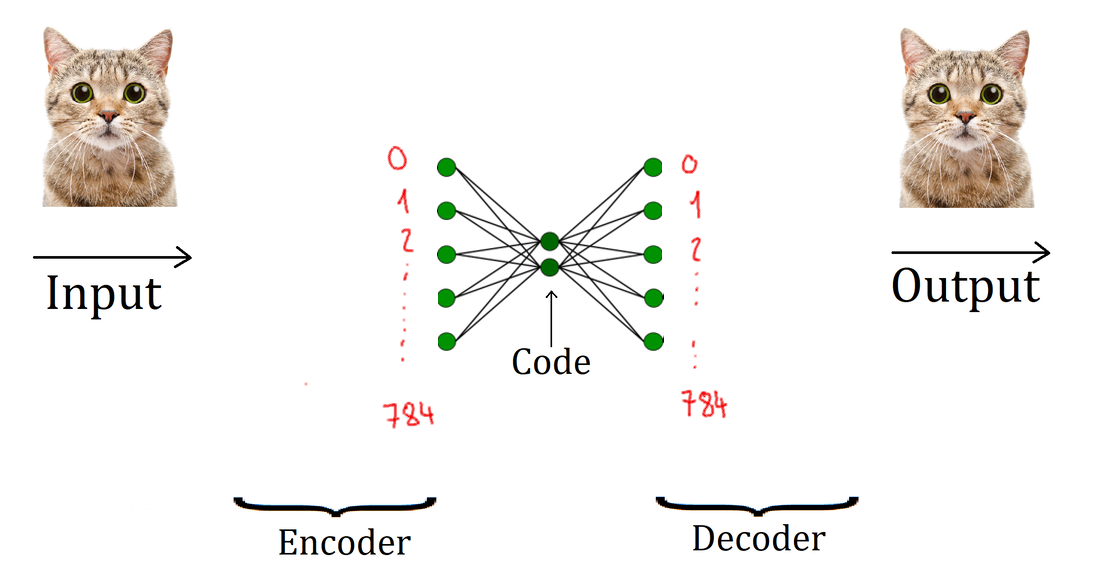

## **Keras** implementation

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential

keras_small_encoder = Sequential([
    Dense(2,   activation='elu', input_shape=(784,)),
])

keras_small_decoder = Sequential([
    Dense(784,  activation='relu', input_shape=(2,)),
])

# Create an explicit Input tensor.
input_img = Input(shape=(784,))

# Pass the input through the encoder and then the decoder.
encoded = keras_small_encoder(input_img)
decoded = keras_small_decoder(encoded)


AE_keras_small = Model(inputs=keras_small_encoder.input, outputs=keras_small_decoder(keras_small_encoder.output))
AE_keras_small.compile(loss='mean_squared_error', optimizer = optimizers.Adam())

In [ ]:
AE_keras_small.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 784)                 │           2,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

Above is equivalent to:

In [ ]:
AE_keras_small_v2 =  Sequential([
    Dense(2,  activation='elu', input_shape=(784,), name="lay1"),
    Dense(784,    activation='linear', name="output"),
])
AE_keras_small_v2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lay1 (Dense)                         │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 784)                 │           2,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = datetime.now()

AE_keras_small.fit(x_train, x_train, batch_size=128, epochs=5, verbose=1)

time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0886
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0619
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0576
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0565
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0557
TRAINING TIME (hh:mm:ss.ms) 0:00:09.110267


In [ ]:
x_train_keras_small_reconstr  = AE_keras_small(x_train)
AE_keras_small_error= np.sum((x_train-x_train_keras_small_reconstr)**2)/(n_samples_train*image_size)
print('AE_keras_small reconstruction error with size 2: ' + str(round(AE_keras_small_error,3)));
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));

AE_keras_small reconstruction error with size 2: 0.055
PCA reconstruction error with 2 PCs: 0.056


In [ ]:
x_train_keras_small_encoded = keras_small_encoder(x_train)

print(x_train_keras_small_encoded.shape)



(60000, 2)


## **PyTorch** implementation

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create a TensorDataset (autoencoder: target = input)
dataset = TensorDataset(x_train_tensor, x_train_tensor)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the encoder (maps 784 -> 2) with ELU activation.
torch_small_encoder = torch.nn.Sequential(
    torch.nn.Linear(784, 2),
    torch.nn.ELU()
)

# Define the decoder (maps 2 -> 784) with ReLU activation.
torch_small_decoder = torch.nn.Sequential(
    torch.nn.Linear(2, 784),
    torch.nn.ReLU()
)

# Compose the autoencoder (AE_keras_small equivalent).
AE_torch_small = torch.nn.Sequential(
    torch_small_encoder,
    torch_small_decoder
)

# define loss function and optimizer:
loss_torch= torch.nn.MSELoss()
optimizer = torch.optim.Adam(AE_torch_small.parameters())

In [ ]:
# Train the autoencoder for 5 epochs.
n_epochs = 5
for epoch in range(n_epochs):
    running_loss = 0.0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = AE_torch_small(inputs)
        loss = loss_torch(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataset)
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.6f}")

Epoch 1/5, Loss: 0.100534
Epoch 2/5, Loss: 0.080873
Epoch 3/5, Loss: 0.077665
Epoch 4/5, Loss: 0.073234
Epoch 5/5, Loss: 0.070675


In [ ]:
x_train_torch_small_encoded = torch_small_encoder(x_train_tensor)

x_train_torch_small_reconstr  = AE_torch_small(x_train_tensor)

In [ ]:
# Compute reconstruction for x_train using AE_torch_small
with torch.no_grad():
    x_train_recon = AE_torch_small(x_train_tensor).cpu().numpy()

# Calculate the reconstruction error:
# Mean squared error per pixel, averaged over all training samples.
AE_torch_small_recon_error = np.sum((x_train - x_train_recon)**2) / (x_train.shape[0] * x_train.shape[1])


x_train_keras_small_reconstr  = AE_keras_small(x_train)
AE_keras_small_error= np.sum((x_train-x_train_keras_small_reconstr)**2)/(n_samples_train*image_size)
print('AE_torch_small reconstruction error with size 2: ' + str(round(AE_torch_small_recon_error,3)));
print('AE_keras_small reconstruction error with size 2: ' + str(round(AE_keras_small_error,3)));
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));


AE_torch_small reconstruction error with size 2: 0.07
AE_keras_small reconstruction error with size 2: 0.055
PCA reconstruction error with 2 PCs: 0.056


# Why encoder and decoder have only one layer?



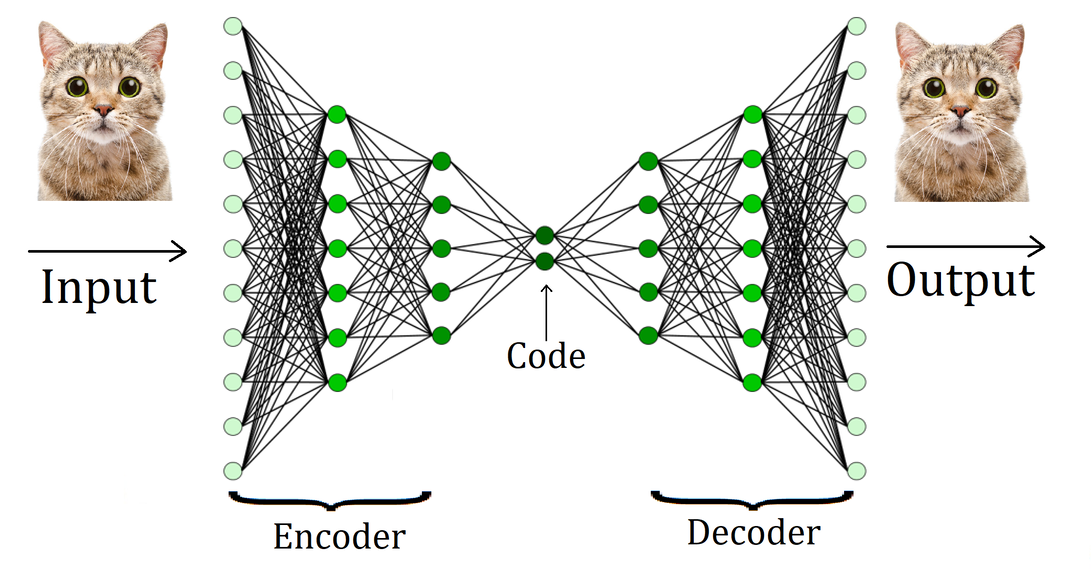

## **Keras** implementation

In [ ]:
keras_larger_encoder = Sequential([
    Dense(512,  activation='elu', input_shape=(784,), name="lay1"),
    Dense(128,  activation='elu'),
    Dense(2,    activation='linear', name="bottleneck"),
])

keras_larger_decoder = Sequential([
    Dense(128,  activation='elu'),
    Dense(512,  activation='elu'),
    Dense(784,  activation='sigmoid'),
])

# Create an explicit Input tensor.
input_img = Input(shape=(784,))

# Pass the input through the encoder and then the decoder.
encoded  = keras_larger_encoder(input_img)
decoded  = keras_larger_decoder(encoded)


AE_keras_larger = Model(inputs=keras_larger_encoder.input, outputs=keras_larger_decoder(keras_larger_encoder.output))
AE_keras_larger.compile(loss='mean_squared_error', optimizer = optimizers.Adam())

In [ ]:
AE_keras_larger.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_6 (Sequential)            │ (None, 2)                   │         467,842 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_7 (Sequential)            │ (None, 784)                 │         468,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 936,466 (3.57 MB)

 Trainable params: 936,466 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = datetime.now()

AE_keras_larger.fit(x_train, x_train, batch_size=128, epochs=10, verbose=1)

time_elapsed = datetime.now() - start_time
print('TRAINING TIME (hh:mm:ss.ms) {}'.format(time_elapsed))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0682
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0470
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0439
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0426
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0411
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0404
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0396
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0391
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0386
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0382
TRAINING TIME (hh:mm:ss.ms) 0:00:26.594144


In [ ]:
x_train_keras_small_reconstr

x_train_keras_larger_reconstr= AE_keras_larger(x_train)
x_train_keras_larger_encoded = keras_larger_encoder(x_train)

In [ ]:
AE_keras_larger_err = np.sum((x_train-x_train_keras_larger_reconstr)**2)/(n_samples_train*image_size)

In [ ]:
print('AE_torch_small reconstruction error with size 2: ' + str(round(AE_torch_small_recon_error,3)));
print('AE_keras_small reconstruction error with size 2: ' + str(round(AE_keras_small_error,3)));
print('PCA reconstruction error with 2 PCs: ' + str(round(PCA_err,3)));
print('AE_keras_large reconstruction error with size 2: ' + str(round(AE_keras_larger_err,3)));

AE_torch_small reconstruction error with size 2: 0.07
AE_keras_small reconstruction error with size 2: 0.055
PCA reconstruction error with 2 PCs: 0.056
AE_keras_large reconstruction error with size 2: 0.038


plot encoded (compressed) points:

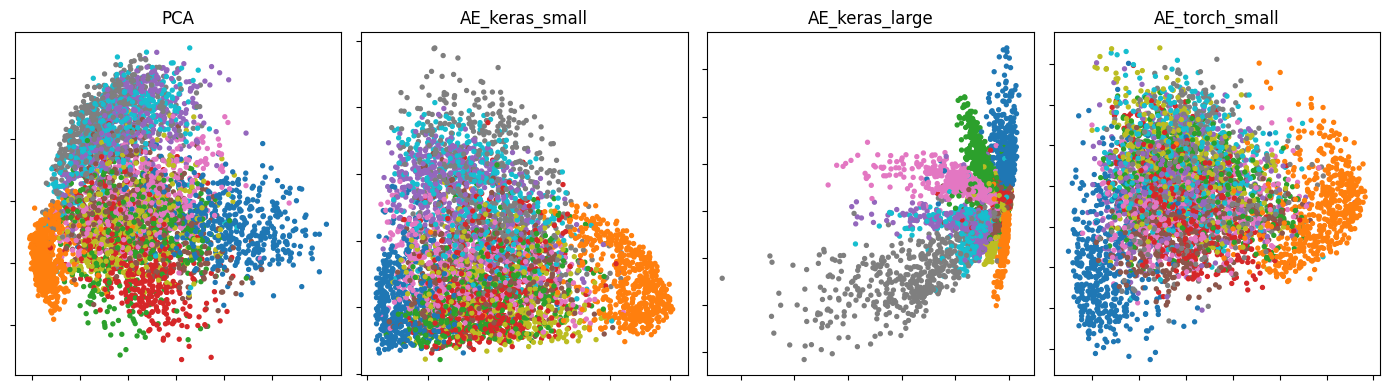

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(141)
plt.title('PCA')
plt.scatter(Zpca[:5000,0], Zpca[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(142)
plt.title('AE_keras_small')
plt.scatter(x_train_keras_small_encoded[:5000,0], x_train_keras_small_encoded[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])

plt.subplot(143)
plt.title('AE_keras_large')
plt.scatter(x_train_keras_larger_encoded[:5000,0], x_train_keras_larger_encoded[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])



plt.subplot(144)
plt.title('AE_torch_small')
plt.scatter(x_train_torch_small_encoded.detach().numpy()[:5000,0], x_train_torch_small_encoded.detach().numpy()[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.gca().get_xaxis().set_ticklabels([])
plt.gca().get_yaxis().set_ticklabels([])


plt.tight_layout()

Reconstructed images:


*   Row 1 = original images
*   Row 2 = PCA
*   Row 3 = AE_keras_small
*   Row 4 = AE_torch_small
*   Row 5 = AE_keras_larger
*   Row 6 = AE_torch_larger (to do)



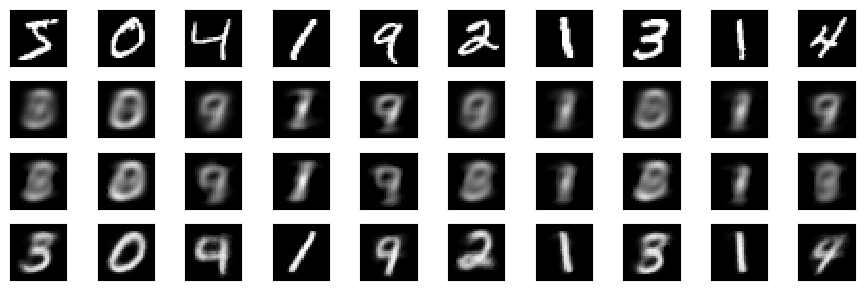

In [ ]:
#x_train_keras_small_reconstr

x_train_torch_small_reconstr

plt.figure(figsize=(9,3))
toPlot = (x_train, Rpca, x_train_keras_small_reconstr,x_train_keras_larger_reconstr)
for i in range(10):
    for j in range(4):
        ax = plt.subplot(4, 10, 10*j+i+1)
        plt.imshow(np.array(toPlot[j][i,:]).reshape(28,28), interpolation="nearest",
                   vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()

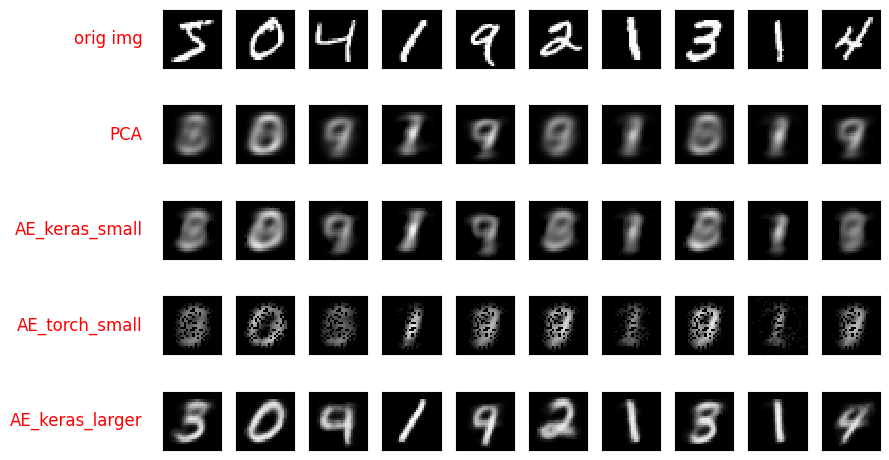

In [ ]:
toPlot = (x_train, Rpca, x_train_keras_small_reconstr, x_train_torch_small_reconstr.detach().numpy(), x_train_keras_larger_reconstr)
text_rows = ["orig img", "PCA", "AE_keras_small", "AE_torch_small", "AE_keras_larger"]

nRows = len(toPlot)   # Should be 5
nCols = 10            # Number of images per row

plt.figure(figsize=(9, 5))  # Increase height for 5 rows

for j in range(nRows):
    for i in range(nCols):
        ax = plt.subplot(nRows, nCols, j*nCols + i + 1)
        # Reshape each image (assumed to be flattened 28x28) and show.
        plt.imshow(np.array(toPlot[j][i, :]).reshape(28, 28), interpolation="nearest", vmin=0, vmax=1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # Add row label on the first column of each row.
        if i == 0:
            ax.text(-0.35, 0.5, text_rows[j],
                    transform=ax.transAxes,
                    fontsize=12,
                    va='center',
                    ha='right',
                    color='red')

plt.tight_layout()
plt.show()

# Q4.1 (10 pts)

* Implement the same/similar Autoencoder for mnist, but **in PyTorch** and repeat previous steps: display reduced points, display (as fifth row) reconstructed images etc.

# Q4.2 (10 pts)
* construct an Autoencoder using PyTorch) with a bottleneck of $r=3$ neurons.
Use the bottleneck features to visualize the data (MNIST) in 3D and display the resulting 3D scatter plots side by side with a 3D PCA reduction.
Display also several reconstructed images (PCA vs AE). Compute reconstruction error.

* For some fixed $r>3$ do the same -- display reconstructed images and compute reconstruction error (compare the latter to previoues $r=2, r=3$ cases)

# AUTOENCODERS FOR DENOSING IMAGES

# Add noise to mnist:

In [ ]:
noise_level=0.25

x_train_noisy = x_train+noise_level*np.random.normal(loc=0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test+noise_level*np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)


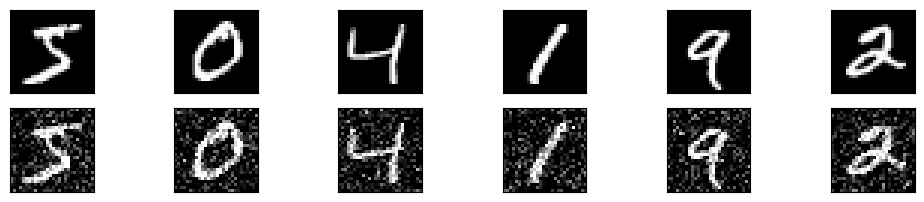

In [ ]:
plt.figure(figsize=(10,12))
for i in range(6):
  ax = plt.subplot(12, 6, i+1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(x_train[i].reshape(28,28), interpolation="nearest", vmin=0, vmax=1)
  ax = plt.subplot(12, 6, 6+i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28), interpolation="nearest", vmin=0, vmax=1)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.tight_layout()

# Q4.3 (10 pts)
* Construct Autoencoder (similar to AE_torch_larger, but may have larger $r$ -- this is a paramter, set initially $r=10$) so that: on input it gets noisy images from training set (i.e., `x_train_noisy`), the output is compared to original unnoised image (i.e., from `x_train`, use `mean_squared_error`).
* Display some of your denoised images
* Unnoise images `x_test_noisy` and compare (MSE) with `x_test`
* Play around: try different number of hidden layers, different activation functions, etc. For your best network try to apply it for larger values of `noise_level`